In [113]:
import matplotlib.pyplot as plt
from metpy.units import units
from metpy.plots import USCOUNTIES
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
import pygrib
import xarray as xr
import numpy as np

In [149]:
grib_messages = pygrib.open('ds.snow.bin')
grib_messages.seek(0)

def accumulator():
    accumulator = np.zeros(np.shape(grib_messages[1].values))
    for message in grib_messages:
        message_number = message.messagenumber
        accumulator = np.add(accumulator, (grib_messages[message_number].values * units('m').to('inch')))
    
    return accumulator

snow = accumulator()

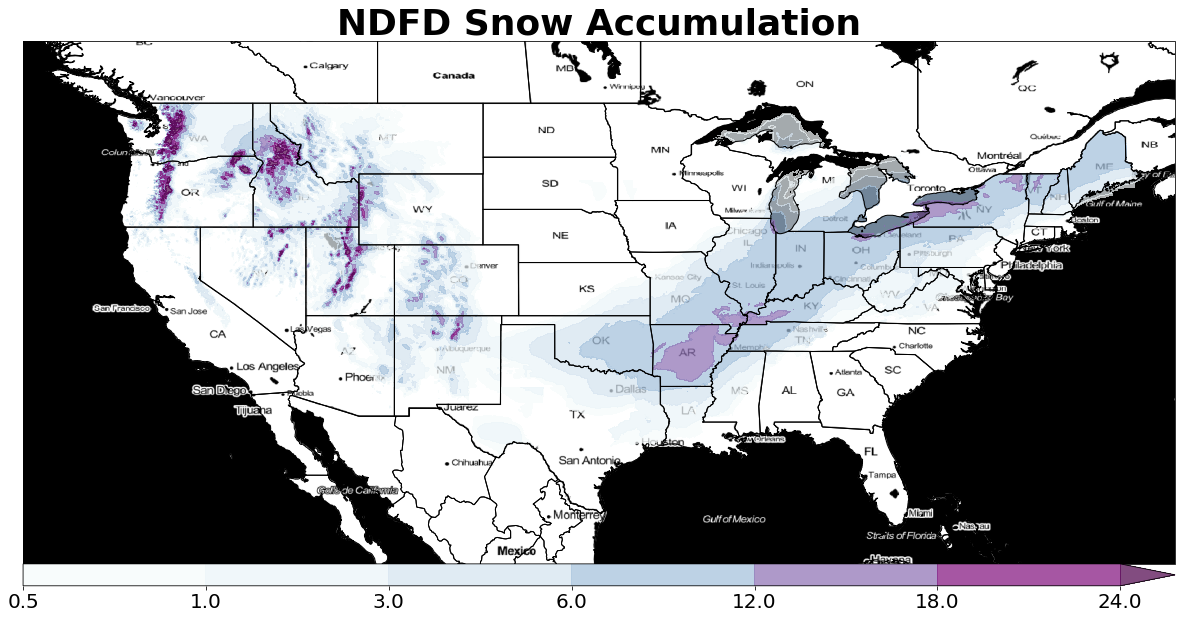

In [151]:
lats, lons = grib_message.latlons()
data_crs = ccrs.PlateCarree()

image = Stamen(style='toner')

fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)
ax.add_image(image, 5)
ax.set_extent([-130, -65, 23, 48])
ax.add_feature(cfeature.STATES.with_scale('10m'))
contour_fill = ax.contourf(lons, lats, snow, [0.5, 1, 3, 6, 12, 18, 24,], extend='max',
                           cmap=plt.cm.BuPu, alpha=0.7, transform=data_crs)

cbar = plt.colorbar(contour_fill, orientation='horizontal', pad=0, aspect=50)
cbar.ax.tick_params(labelsize=20)

plt.title('NDFD Snow Accumulation', fontsize=36, fontweight='bold')
plt.savefig('snow.png', dpi=72)